# Lab 02: Diagnosis of Pneumonia via CXR Images


## Business Understanding

The chosen dataset for Lab Two consists of 5,863 chest X-Ray images from Kaggle [1]. These images were attained from a retrospective study of pediatric patients aged one to five divided into cohorts according to their pneumonia status. The World Health Organization (WHO) states that pneumonia is among the leading causes of death for children under five years of age [2]. This is inevitably a motivating factor for why we chose this dataset. 

There are 120 million episodes of pneumonia per year in children under five, and a child dies every 43 seconds due to this terrible disease [3, 4]. One of the most well-recognized challenges in global medicine is the inconsistent definition and classification of pneumonia - no gold standard exists and there are varying patterns of case definitions used between studies that drive the misclassification issue [5]. Hence, there is a need to develop an automated way of implementing clinical decisions that can save the lives of hundreds of thousands of children per year globally. 

We seek to build a classifier that reliably predicts the diagnosis of pneumonia in young children based on the results of their chest X-Ray. A 2021 study on public health facilities in Tanzania, which was listed by the WHO as one of the top 10 countries with the highest number of deaths for children under 5 years in 2020, states that chest radiography (CXR) coupled with diagnostic outlines provided by Integrated Management of Childhood Illness (IMCI) proved to have a sensitivity of 69.9% and a specificity of 59.6% [6]. Based on this finding, the goal is for our classifier to be above this sensitivity and specificity threshold to mitigate even the smallest human error that could be posed in the diagnostic process so as to maximize the number of lives that can be saved through correct diagnosis. 

The target “third party” of interest will be high-mortality countries such as Nigeria, India, and Pakistan, among others. The goal is to build an affordable model that can be easily adapted to public clinics across the countries that account for the majority of child mortality due to pneumonia. It will become clear that these deaths are largely preventable with diagnostic tools that empower physicians around the world to virtually make no mistakes when it comes to this issue. 

In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import pylab as pl
import matplotlib.pyplot as plt

## Data Preparation

The grayscale X-Ray images were read in and resized to 200 x 200 pixels each. Next, we linearized the images so that each row represented an image in the dataset and each column was a pixel / feature of the image. In order to keep up with each image’s true diagnosis, we added a binary case column.

In [2]:
"""
Read in your images as numpy arrays. Resize and recolor images as necessary. 
"""
normal_images = []
pneumonia_images = []

image_size = (200, 200)


normal_path = "\Users\mahsa\Desktop\Courses\ML\train\NORMAL\"
pneumonia_path= "\Users\mahsa\Desktop\Courses\ML\train\PNEUMONIA\"

normal_dir = os.fsencode(normal_path)
pneumonia_dir = os.fsencode(pneumonia_path)

# loop through all NORMAL images, convert to numpy array, store in normal_images
for file in os.listdir(normal_dir):
    file_str = normal_path + str(file)[2:-1]
    if file_str.endswith(".jpeg"):
        img = Image.open(file_str)
        img = img.resize(image_size)
        normal_images.append(np.asarray(img))
        
        
# loop through all PNEUMONIA images, convert to numpy array, store in pneumonia_images
for file in os.listdir(pneumonia_dir):
    file_str = pneumonia_path + str(file)[2:-1]
    if file_str.endswith(".jpeg"):
        img = Image.open(file_str)
        img = img.resize(image_size)
        np_shape = np.asarray(img)
        if np_shape.ndim == 3:
            np_shape = np_shape[:, :, 0]
        pneumonia_images.append(np_shape)
        
print(len(normal_images)) # how many normal images do we have? 
print(len(pneumonia_images)) # how many pneumonia images do we have? 
print(type(normal_images[0]))
print(type(pneumonia_images[0]))
print(type(normal_images[-1]))
print(type(pneumonia_images[-1]))

1341
3875
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
"""
Linearize the images to create a table of 1-D image features
"""
# flat_normal = []
# flat_pne = []

# column_names = np.arange(1, 40001, step=1)

df = pd.DataFrame()

for normal_image in normal_images:
    flat = np.asarray(normal_image).flatten()
    flat = flat.transpose()
    temp_df = pd.DataFrame(flat.reshape(1,-1))
    temp_df = temp_df.assign(case = 0)
    df = pd.concat([df, temp_df])
    
for pneumonia_image in pneumonia_images:
    flat = np.asarray(pneumonia_image).flatten()
    flat = flat.transpose()
    temp_df = pd.DataFrame(flat.reshape(1,-1))
    temp_df = temp_df.assign(case = 1)
    df = pd.concat([df, temp_df])

df = df.reset_index()
print(df)

      index    0    1    2    3    4    5    6    7    8  ...  39991  39992  \
0         0   25   28   28   29   28   28   28   28   28  ...      0      0   
1         0  111   71   56   55   50   46   68   82   83  ...     41     32   
2         0   41   51   63   69   75   81   85   89   93  ...      0      0   
3         0    0    6   12   19   28   36   41   46   50  ...      0      0   
4         0  113  115  118  121  122  127  128  128  171  ...     41     23   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
5211      0    0    0    0    8   14   18   82  109   11  ...     14     16   
5212      0   39   40   42   42   43   47   49   51   54  ...     24     26   
5213      0    8    9   10    7   25  223   51    1   89  ...      6      3   
5214      0   39   39   40   41   40   40   40   41   40  ...     29     30   
5215      0   41   44   51   54   54   84  134  124  111  ...      0      0   

      39993  39994  39995  39996  39997  39998  399

In [5]:
"""
Data Properties
"""
n_samples, n_features = df.shape
n_classes = df["case"].unique()

print(f"# of samples {n_samples}")
print(f"# of features {n_features-2}")
print(f"# of classes {n_classes}")

n_row = image_size[0]
n_col = image_size[1]

# of samples 5216
# of features 40000
# of classes [0 1]


By now, we have successfully linearized the images and kept their respective classes. Next, we create a gallery of visualizations to assess the cases we are working with. 

### Data Visualization

In [6]:
# drop index and case column to visualize image

X1 = df.drop(columns=["index","case"], axis=1).to_numpy()
y1 = n_classes 
h, w = image_size

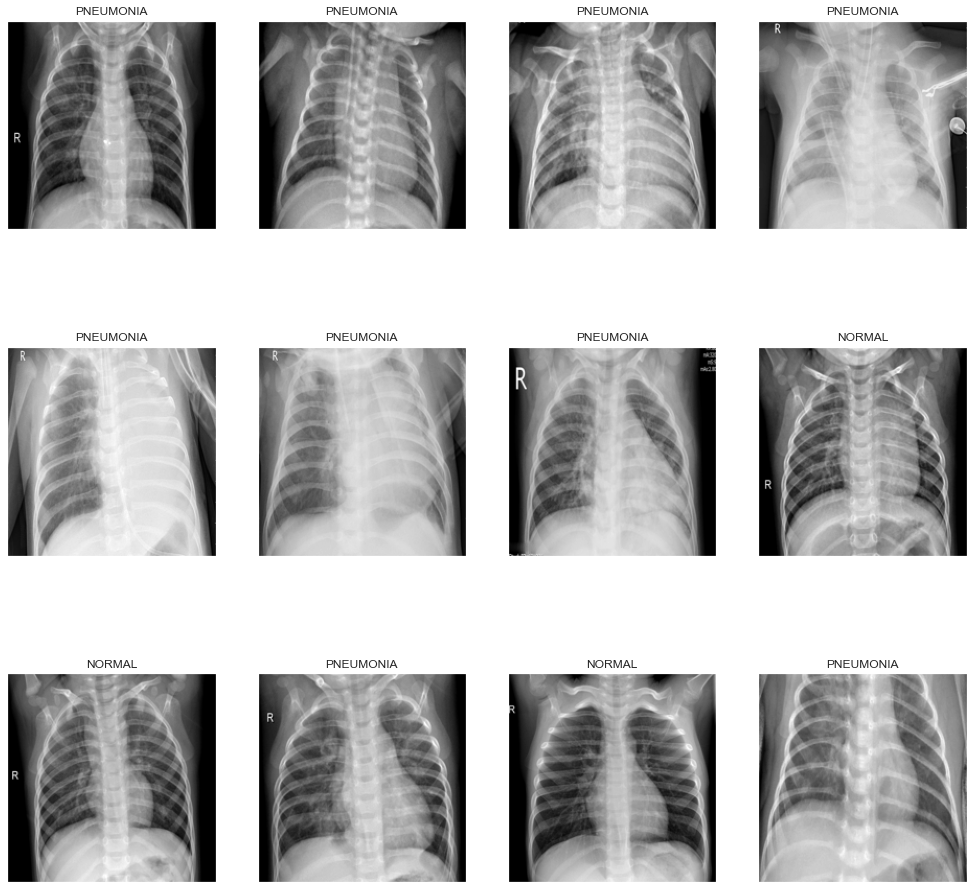

In [369]:
"""
Visualize several images
"""
import random
random.seed(24)
x = random.sample(range(len(X1)), 12)
y = df["case"].to_numpy()
images = X1[x]
titles = y[x]

def plot_gallery(images, titles, h, w, n_row, n_col):
    plt.figure(figsize=(3.4 * n_col, 4.6 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape(image_size), cmap=plt.cm.gray)
        if titles[i] == 0:
            plt.title("NORMAL", size=12)
        if titles[i] == 1:
            plt.title("PNEUMONIA", size=12)
        plt.xticks(())
        plt.yticks(())

plot_gallery(images, titles, h, w, 3, 4)

The random sample of images featured above shows that we have more pneumonia cases than normal in our dataset. It seems this prediction task is going to be difficult, and it makes sense why cases of pneumonia are often misclassified in children. From this, we gather that pneumonia looks like an enlarged lung, represented by a greater shadow or fog in the X-Rays that seems to indicate the presence of fluid or inflammation. The most difficult factor in our approach will probably be the difference in size of children, quality of X-Ray image, and proximity of the machine to the child causing a vast amount of variation between images. 

## Data Reduction

### PCA

Below we use PCA to reduce the dimensions of our images from 40,000 descriptive pixels to 300 features.

### Regular PCA

In [10]:
from sklearn.decomposition import PCA

n_components = 300
print ("Extracting the top %d eigenXrays from %d images" % (n_components, X1.shape[0]))

pca = PCA(n_components=n_components)
%time pca.fit(X1.copy())
eigenimage = pca.components_.reshape((n_components, h, w))

Extracting the top 300 eigenXrays from 5216 images
CPU times: user 1min 28s, sys: 1.54 s, total: 1min 30s
Wall time: 25.5 s


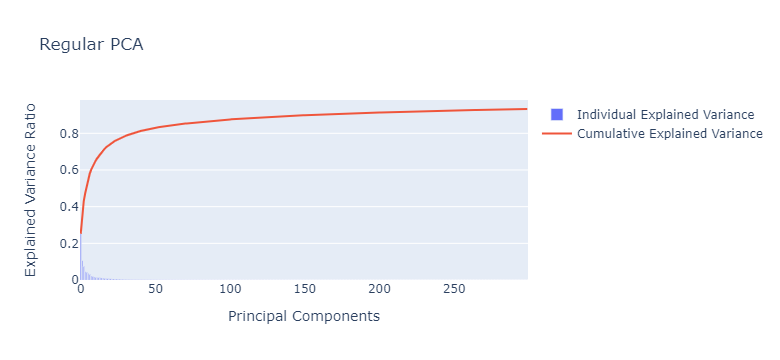

In [29]:
def plot_explained_variance(pca, title = ''): 
    import plotly
    from plotly.graph_objs import Bar, Line
    from plotly.graph_objs import Scatter, Layout
    from plotly.graph_objs.scatter import Marker
    from plotly.graph_objs.layout import XAxis, YAxis
    plotly.offline.init_notebook_mode() 
    
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='Individual Explained Variance'),
                 Scatter(y=cum_var_exp, name='Cumulative Explained Variance')
                ],
        "layout": Layout(xaxis=XAxis(title='Principal Components'), yaxis=YAxis(title='Explained Variance Ratio'),
                        title = title)
    })
    
plot_explained_variance(pca, 'Regular PCA')

With 300 components, approximately 93.26% of the total variance in the images is explained / captured. This is a vast reduction in features, from 40,000 per images, to 300. For the sake of computational efficiency, we chose to proceed with 300 components. When we tested 500 components, it resulted in just over 95% of the variance in the images being captured, but was (obviously) more computationally expensive. Again, this highlights the foreseeable issue of classifying these images when variation between them is the driver of misdiagnosis. A gold standard for diagnosis ceases to exist because of this!  

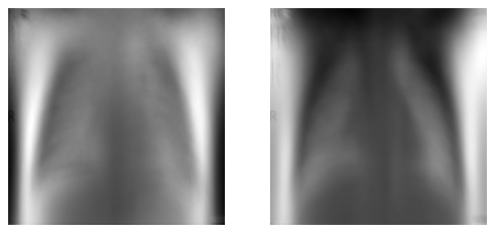

In [370]:
eigenimage_titles = ["eigenimage %d" % i for i in range(eigenimage.shape[0])]
plot_gallery(eigenimage, eigenimage_titles, h, w, 1, 2)

The above images highlight the key features that are demonstrated by the dimension reduction of our images via PCA to 300 components. It is obvious that classifying based on these limited features will likely lead to some issues as it appears that the inflammation / fluid in the lungs is not well captured by this method. 

In [12]:
def reconstruct_image(trans_obj,org_features):   
    low_rep = trans_obj.transform(org_features)
    rec_image = trans_obj.inverse_transform(low_rep)
    return low_rep, rec_image
    
idx_to_reconstruct = 4    
X_idx = X1[idx_to_reconstruct]
low_dimensional_representation, reconstructed_image = reconstruct_image(pca,X_idx.reshape(1, -1))

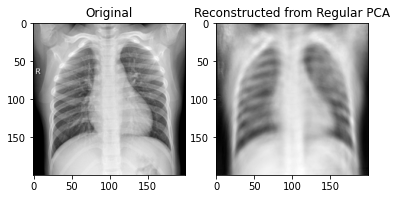

In [13]:
plt.subplot(1,2,1)
plt.imshow(X_idx.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Original')
plt.grid(False)
plt.subplot(1,2,2)
plt.imshow(reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Reconstructed from Regular PCA')
plt.grid(False)

The reconstruction of the fourth image in our data looks promising, as the contrast in the lung area is the focus of our diagnosis and it appears to be reconstructed in a way that could still lead to a clear diagnosis. From the gallery in the **Data Visualization** section, we see that not all images display the the same clear contrast between the lungs, ribcage, and and other entities - these will be the more challenging diagnoses. 

### Randomized PCA

In [32]:
n_components = 300
print ("Extracting the top %d eigenXrays from %d faces" % (
    n_components, X1.shape[0]))
rpca = PCA(n_components=n_components,svd_solver='randomized')
%time rpca.fit(X1.copy())
eigenimage = rpca.components_.reshape((n_components, h, w))

Extracting the top 300 eigenXrays from 5216 faces
CPU times: user 1min 11s, sys: 1.14 s, total: 1min 12s
Wall time: 20.4 s


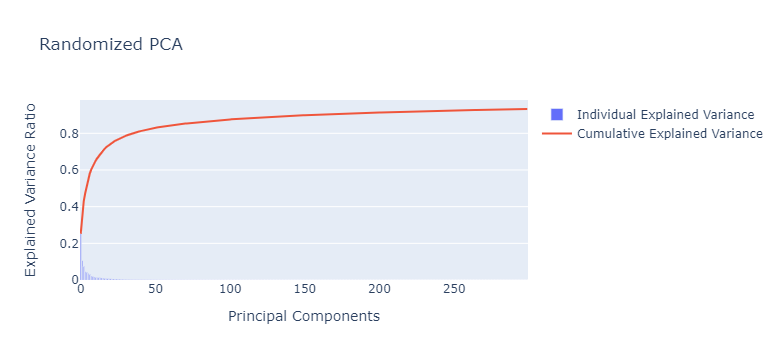

In [33]:
plot_explained_variance(rpca, 'Randomized PCA')

With 300 components from randomized PCA, again approximately 93.26% of the total variance in the images is explained / captured. This indicates that there is not a great difference between randomized and regular PCA for our data when choosing 300 components for the dimension reduction. 

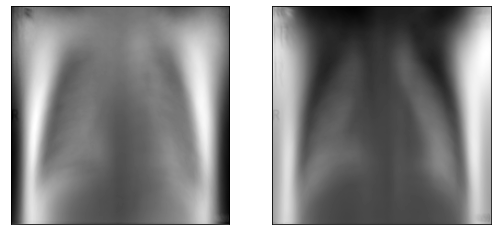

In [15]:
eigenimage_titles = ["eigenXrays %d" % i for i in range(eigenimage.shape[0])]
plot_gallery(eigenimage, eigenimage_titles, h, w)

The above images highlight the key features that are demonstrated by the dimension reduction of our images via randomized PCA to 300 components. Again, it appears that the inflammation / fluid in the lungs is not well captured by this method. 

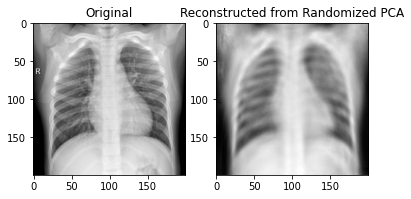

In [16]:
idx_to_reconstruct = 4 
X_idx = X1[idx_to_reconstruct]
low_dimensional_representation, rand_reconstructed_image = reconstruct_image(rpca,X_idx.reshape(1, -1))
plt.subplot(1,2,1)
plt.imshow(X_idx.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Original')
plt.grid(False)
plt.subplot(1,2,2)
plt.imshow(rand_reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Reconstructed from Randomized PCA')
plt.grid(False)

Utilizing the same image as before with regular PCA, the reconstruction of the fourth image in our data looks promising, and it seems to be reconstructed in a way that could again lead to a clear diagnosis.

### Compare Regular and Randomized PCA

In [17]:
compare_df = df.drop(columns=["index","case"], axis=1)

In [18]:
"""
Using the Root Mean Square Error to calculate the difference between Regular PCA and Original 
compared to Randomize PCA and Original 
"""

import math, random

number_of_total_imgs = len(normal_images) + len(pneumonia_images)

def root_mean_square_error(reg, rand, orig):
    reg = reg.tolist()[0]
    rand = rand.tolist()[0]
    orig = orig.tolist()
    
    reg_total_sum = 0.0
    rand_total_sum = 0.0
    for i in range(len(reg)):
        reg_total_sum += (orig[i] - reg[i]) ** 2
        rand_total_sum += (orig[i] - rand[i]) ** 2
        
    reg_rmse = math.sqrt(reg_total_sum / 40000)
    rand_rmse = math.sqrt(rand_total_sum / 40000)
    
    return (reg_rmse, rand_rmse)

reg_sum = 0
rand_sum = 0

# get random samples to calculate approx. error 
random.seed(24)
random_samples = compare_df.sample(n=500)

for index, original in random_samples.iterrows():
    orig = original.to_numpy()
    low_dimensional_representation, reg_recontructed = reconstruct_image(pca, orig.reshape(1, -1))
    low_dimensional_representation, rand_reconstructed_image = reconstruct_image(rpca, orig.reshape(1, -1))
    result = root_mean_square_error(reg_recontructed, rand_reconstructed_image, orig)
    reg_sum += result[0]
    rand_sum += result[1]

avg_reg_pca = reg_sum / number_of_total_imgs
avg_rand_pca = rand_sum / number_of_total_imgs

print(f"Average Regular PCA Error: {avg_reg_pca}")
print(f"Average Random PCA Error: {avg_rand_pca}")

if avg_reg_pca > avg_rand_pca:
    print("Random PCA is better!")
else:
    print("Regular PCA is better!")

Average Regular PCA Error: 0.936647484004162
Average Random PCA Error: 0.9363561497228784
Random PCA is better (and faster)!


The result above tends to vary depending on the sample, but we decided to utilize the average RMSE of the images and compare it between regular PCA and randomized PCA. Random PCA tends to give us a lower error, but by an almost negligible margin. This is likely due to the fact that we did not capture enough variation in the data with our PCs to really see the difference between the two approaches.

The RMSE formula was adapted to be averaged over all images as follows:

$$ RMSE = \frac{ \sum_{n=1}^{M}\sqrt{\frac{\sum_{i=1}^{N}(x_i - \hat{x}_i)^2}{N}} } {M} $$

where N is pixel of an image (max 40,000), and M is the number of images used in the random sample. Above, we calculated the average RMSE for both methods in a random sample of 500 images for the sake of computation time. To reiterate, random PCA was found to have a lower average RMSE across images than regular PCA.

Below, we also built a nearest neighbor classifier for the methods and found that randomized PCA was ever so slightly more accurate than regular PCA and also more sensitive, meaning it is more likely to predict an X-Ray as positive for pneumonia when the case is truly positive than the regular PCA method. 

For all of these reasons, randomized PCA is preferred for our dataset over regular PCA. 

### Feature Extraction (DAISY)

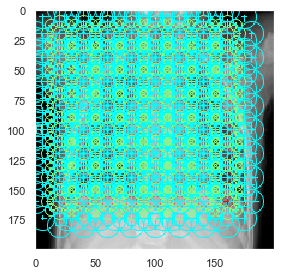

In [371]:
"""
Daisy with the total DAISY vector
"""
from skimage.io import imshow
from skimage.filters import sobel_h, sobel_v
from skimage.feature import daisy

random.seed(24)
idx_to_reconstruct = int(np.random.rand(1)*len(X1))
img  = X1[idx_to_reconstruct].reshape((h,w))

features, img_desc = daisy(img, 
                           step=20, 
                           radius=20, 
                           rings=2, 
                           histograms=8, 
                           orientations=4, 
                           visualize=True)
imshow(img_desc)
plt.grid(False)

The image above shows the daisy descriptors that are going to be applied to every image in our dataset in order to extract key features for classfication and key point matching. 

In [36]:
features = daisy(img, step=20, radius=20, rings=2, histograms=8, orientations=8, visualize=False)
print(features.shape)
print(features.shape[0]*features.shape[1]*features.shape[2])

def apply_daisy(row,shape):
    feat = daisy(row.reshape(shape), step=20, radius=20, 
                 rings=2, histograms=8, orientations=4, 
                 visualize=False)
    return feat.reshape((-1))

%time test_feature = apply_daisy(X1[3],(h,w))
test_feature.shape

# apply to entire data, row by row
%time daisy_features = np.apply_along_axis(apply_daisy, 1, X1, (h,w))
print(daisy_features.shape)

(8, 8, 136)
8704
CPU times: user 31.5 ms, sys: 2.27 ms, total: 33.8 ms
Wall time: 34 ms
CPU times: user 2min 24s, sys: 5.33 s, total: 2min 29s
Wall time: 2min 30s
(5216, 4352)


In [73]:
from sklearn.metrics.pairwise import pairwise_distances
# find the pairwise distance between all the different image features
%time dist_matrix = pairwise_distances(daisy_features)

CPU times: user 3.6 s, sys: 51.8 ms, total: 3.65 s
Wall time: 970 ms


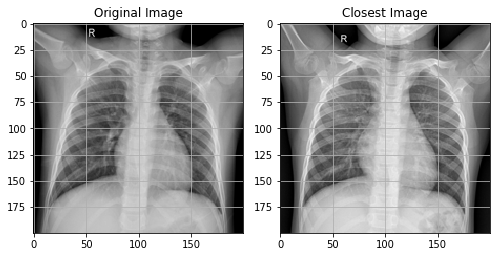

In [38]:
import copy
# find closest image to current image
idx1 = 5
distances = copy.deepcopy(dist_matrix[idx1,:])
distances[idx1] = np.infty # dont pick the same image!
idx2 = np.argmin(distances)

plt.figure(figsize=(7,10))
plt.subplot(1,2,1)
imshow(X1[idx1].reshape((h,w)))
plt.title("Original Image")
plt.grid()

plt.subplot(1,2,2)
imshow(X1[idx2].reshape((h,w)))
plt.title("Closest Image")
plt.grid()

In [372]:
if y[idx1] == 0:
    print("Orginal Image: NORMAL")
else:
    print("Original Image: PNEUMONIA")

if y[idx2] == 0:
    print("Closest Image: NORMAL")
else:
    print("Closest Image: PNEUMONIA")

Orginal Image: NORMAL
Closest Image: NORMAL


Performing feature extraction via daisy seems to lead to promising results. Since it uses a "bag-of-features" representation of images, it may prove difficult for the method to find similarities between lower quality X-Rays since the features are less prominent [7]. The images above were found to have the closest features in the training set according to the minimum pairwise distances calculated from the daisy output. Both of these cases were negative for pneumonia, so the features gathered by daisy resulted captured the normal case well in this example. 

In [74]:
# Another option, use a heat map of the pairwise differences (ordered by class) among all extracted features.

# import seaborn as sns
# cmap = sns.set(style="darkgrid") # one of the many styles to plot using

# f, ax = plt.subplots(figsize=(8, 8))
# sns.heatmap(dist_matrix, cmap=cmap, annot=True)

### KNN Classifier
###### Test Data

In [76]:
tnormal_images = []
tpneumonia_images = []

image_size = (200, 200)

tnormal_path = "/Users/kirstinpruitt/Desktop/CS 7324/labs/lab 2/test/NORMAL/"
tpneumonia_path = "/Users/kirstinpruitt/Desktop/CS 7324/labs/lab 2/test/PNEUMONIA/"

normal_dir = os.fsencode(tnormal_path)
pneumonia_dir = os.fsencode(tpneumonia_path)

# loop through all NORMAL images, convert to numpy array, store in normal_images
for file in os.listdir(normal_dir):
    file_str = tnormal_path + str(file)[2:-1]
    if file_str.endswith(".jpeg"):
        img = Image.open(file_str)
        img = img.resize(image_size)
        tnormal_images.append(np.asarray(img))
        
        
# loop through all PNEUMONIA images, convert to numpy array, store in pneumonia_images
for file in os.listdir(pneumonia_dir):
    file_str = tpneumonia_path + str(file)[2:-1]
    if file_str.endswith(".jpeg"):
        img = Image.open(file_str)
        img = img.resize(image_size)
        np_shape = np.asarray(img)
        if np_shape.ndim == 3:
            np_shape = np_shape[:, :, 0]
        tpneumonia_images.append(np_shape)
        
print(len(tnormal_images))
print(len(tpneumonia_images))

234
390


In [79]:
# flat_tnormal = []
# flat_tpne = []

# column_names = np.arange(1, 40001, step=1)

df_test = pd.DataFrame()

for normal_image in tnormal_images:
    flat = np.asarray(normal_image).flatten()
    flat = flat.transpose()
    temp_df = pd.DataFrame(flat.reshape(1,-1))
    temp_df = temp_df.assign(case = 0)
    df_test = pd.concat([df_test, temp_df])
    
for pneumonia_image in tpneumonia_images:
    flat = np.asarray(pneumonia_image).flatten()
    flat = flat.transpose()
    temp_df = pd.DataFrame(flat.reshape(1,-1))
    temp_df = temp_df.assign(case = 1)
    df_test = pd.concat([df_test, temp_df])

df_test = df_test.reset_index()
print(df_test)

     index    0    1    2    3    4    5    6    7    8  ...  39991  39992  \
0        0   21   22   22   21   21   20   20   21   20  ...     35     34   
1        0    1    2    3    3    4    4    4    5    5  ...      6      6   
2        0   65   71   68   56   54   55   52   48   43  ...      0      0   
3        0    0    0    0    0    0    0    0    7   12  ...      0      0   
4        0   11   18   29   54   72   83   90   98  105  ...      0      0   
..     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
619      0   46   46   43   45   46   46   46   47   47  ...    117    106   
620      0   18   18   22   24   21   16   12    6   14  ...     23     23   
621      0  224  216  221  215  218  223  227  225  218  ...     16     16   
622      0  182  189  177  175  178  113   33   43   50  ...     22     22   
623      0   19   19   19   17   17   17   17   17   17  ...     26     27   

     39993  39994  39995  39996  39997  39998  39999  case  
0 

In [82]:
X2 = df_test.drop(columns=["index","case"], axis=1).to_numpy()
#y2 = df_test["case"].unique()
y1 = df["case"]
y2 = df_test["case"]
h, w = image_size

Does this feature extraction method show promise for your prediction task? Why? 
- Option: build a nearest neighbor classifier to see actual classification performance.  

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_pca = KNeighborsClassifier(n_neighbors=1)
knn_rpca = KNeighborsClassifier(n_neighbors=1)
knn_dsy = KNeighborsClassifier(n_neighbors=1)

pca_train = pca.transform(copy.deepcopy(X1))
pca_test = pca.transform(copy.deepcopy(X2))

rpca_train = rpca.transform(copy.deepcopy(X1))
rpca_test = rpca.transform(copy.deepcopy(X2))

# daisy_features = np.apply_along_axis(apply_daisy, 1, X1, (h,w)) *** training set
testdaisy_features = np.apply_along_axis(apply_daisy, 1, X2, (h,w))

# accuracy between predicted labels, and actual labels

# PCA accuracy
knn_pca.fit(pca_train,y1)
acc_pca = accuracy_score(knn_pca.predict(pca_test),y2)

# rPCA accuracy
knn_rpca.fit(rpca_train,y1)
acc_rpca = accuracy_score(knn_rpca.predict(rpca_test),y2) 

# daisy accuracy 
knn_dsy.fit(daisy_features,y1)
acc_dsy = accuracy_score(knn_dsy.predict(testdaisy_features),y2)

print(f"PCA accuracy:{100*acc_pca:.2f}%, rPCA accuracy:{100*acc_rpca:.2f}%, Daisy Accuracy:{100*acc_dsy:.2f}%".format())

PCA accuracy:76.28%, rPCA accuracy:76.44%, Daisy Accuracy:81.89%


In [339]:
from skimage.feature import (match_descriptors, plot_matches)
from sklearn.metrics import confusion_matrix

pca_cm = confusion_matrix(y2, knn_pca.predict(pca_test))
sensitivity_pca = pca_cm[0,0]/(pca_cm[0,0]+pca_cm[0,1])
print(f"PCA Sensitivity:{100*sensitivity_pca:.2f}%".format())

rpca_cm = confusion_matrix(y2, knn_rpca.predict(rpca_test))
sensitivity_rpca = rpca_cm[0,0]/(rpca_cm[0,0]+rpca_cm[0,1])
print(f"rPCA Sensitivity:{100*sensitivity_rpca:.2f}%".format())

dsy_cm = confusion_matrix(y2, knn_dsy.predict(testdaisy_features))
sensitivity_dsy = dsy_cm[0,0]/(dsy_cm[0,0]+dsy_cm[0,1])
print(f"Daisy Sensitivity:{100*sensitivity_dsy:.2f}%".format())

PCA Sensitivity:41.88%
rPCA Sensitivity:42.31%
Daisy Sensitivity:56.41%


The Daisy feature extraction method shows the most potential among the 3 methods tested in the classifier as it resulted in the highest accuracy and sensitivity in the diagnosis of pneumonia. While this does show promise toward our prediction task with 81.89% accuracy and 56.41% sensitivity from daisy features being plugged in to a KNN Classifier, it does not meet the standard we have set forth for an optimal model that we would want to bring to market. In the future, we need to find a better way of optimizing the classification of images. Overall, the numbers reported here are encouraging. 

## Key Point Matching with DAISY

Below is our attempt at emulating the process of key point matching as described in class. 

First, since this task was proven to be extremely computationally expensive, we took a random sample of 500 images from the training set and 100 images from the test set to plug into the loop. For each selected test image, daisy feature extraction was applied and the descriptors were reshaped from 3-D to 2-D [8]. Then, for each image in the training set, the same process was applied. The 2-D descriptor arrays were applied to scikit-image's `match_descriptors()` function, with a maximum distance between descriptors set to 0.05, which is a generous way of defining a match. The image in the training set that resulted in the most matches with the image in the test set was considered the best match for the test image and recorded as such. The diagnosis of the respective training image found to be the best match for the test image was assigned as the predicted diagnosis for the test image. 

In [241]:
random.seed(24)
x1 = random.sample(range(len(X1)), 500)
x2 = random.sample(range(len(X2)), 100)

In [242]:
train = X1[x1,:]
test = X2[x2,:]

#record = list()
best_matches = list()
    
for j in range(len(test)):
    test_img = test[j].reshape((h,w))
        
    desc2 = daisy(test_img, step=20, radius=20, rings=2, histograms=8, orientations=4, visualize=False)

    desc_num2 = desc2.shape[0] * desc2.shape[1]
    daisy_descriptor2 = desc2.reshape(desc_num2, desc2.shape[2])
    
    max_matches = 0
    temp_record = list()
        
    for i in range(len(train)):
        train_img  = train[i].reshape((h,w))
    
        desc1 = daisy(train_img, step=20, radius=20, rings=2, histograms=8, orientations=4, visualize=False)

        desc_num1 = desc1.shape[0] * desc1.shape[1]
        daisy_descriptor1 = desc1.reshape(desc_num1, desc1.shape[2])
        
        matches = match_descriptors(daisy_descriptor1, daisy_descriptor2, cross_check = True, max_distance = 0.05)
        
        if len(matches) > max_matches:
            max_matches = len(matches)
            temp_record = [j, i, len(matches)]
        
        #record += [[j, i, len(matches)]]
        
    best_matches += [temp_record]

In [373]:
#print(best_matches)

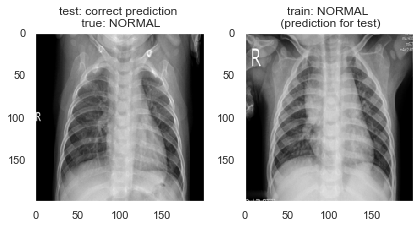

In [327]:
n = 50

plt.subplot(1,2,1)
imshow(test[best_matches[n][0]].reshape(h,w))
plt.grid(False)
if y1[x1[n]] == 0 & y2[x2[n]] == 0:
    plt.title("test: correct prediction \n true: NORMAL", size = 12)
elif y1[x1[n]] == 1 & y2[x2[n]] == 1:
    plt.title("test: correct prediction \n true: PNEUMONIA", size = 12)
elif y1[x1[n]] == 0 & y2[x2[n]] == 1:
    plt.title("test: incorrect prediction \n true: PNEUMONIA", size = 12)    
else:
    plt.title("test: incorrect prediction \n true: NORMAL", size = 12)
    
plt.subplot(1,2,2)
imshow(train[best_matches[n][1]].reshape(h,w))
plt.grid(False)
if y1[x1[n]] == 0:
    plt.title("train: NORMAL \n (prediction for test)", size = 12)
else:
    plt.title("train: PNEUMONIA \n (prediction for test)", size = 12)

The images above are a pair from the training and test set that were found to have the maximum number of matches between daisy descriptors among the respective options. In this case, the training image would predict Normal or No Pneumonia for the test image, and that would be the correct outcome. 

In [309]:
# accuracy 

count = 0

for matches in best_matches:
    j = matches[0]
    i = matches[1]
    test_pred = y1[x1[i]]
    test_true = y2[x2[j]]
    
    if test_pred == test_true:
        count += 1
        
accuracy = 100*count/len(best_matches)
print(accuracy)

80.0


The accuracy of this approach was found to be 80%, which is slightly lower than the result using the total daisy vector to predict the outcome using a KNN classifier. Due to the computational inefficiency of our particular approach and the lower accuracy achieved, the first method for classification is preferred over key point matching.  Nevertheless, this is a relatively good accuracy. 

In [333]:
# sensitivity: probability that those with pneumonia will be correctly predicted as having pneumonia
# specificity: probability that those without pneumonia will be correctly predicted as not having pneumonia
# ppv: percentage chance that a positive predicted case is a true positive (PNEUMONIA)
# npv: percentage chance that a negative predicted case is a true negative (NORMAL)

tp = 0
fp = 0
tn = 0
fn = 0

for matches in best_matches:
    j = matches[0]
    i = matches[1]
    if y2[x2[j]] == 1 & y1[x1[i]] == 1:
        tp += 1
    elif y2[x2[j]] == 1 & y1[x1[i]] == 0:
        fn += 1
    elif y2[x2[j]] == 0 & y1[x1[i]] == 0:
        tn += 1
    #if y2[x2[j]] == 0 & y1[x1[i]] == 1:
    else:
        fp += 1

sensitivity = 100*tp/(tp + fn)
specificity = 100*tn/(tn + fp)
ppv = 100*tp/(tp + fp)
npv = 100*tn/(tn + fn)
print(f"Sensitivity:{sensitivity:.2f}%, Specificity:{specificity:.2f}%, Positive Predictive Value:{ppv:.2f}%, Negative Predictive Value:{npv:.2f}%".format())
#print((tp, tn, fp, fn))

Sensitivity:61.25%, Specificity:80.00%, Positive Predictive Value:92.45%, Negative Predictive Value:34.04%


In terms of other relevant statistics in the realm of clinical decisions, the key point matching method led to a more sensitive classification approach. This method is more likely to correctly predict a case of Pneumonia that truly exists, which is encouraging and important to our overarching goal on this project. It is critical that we catch the cases that are positive for pneumonia in order to make a dent in the issue of misdiagnosis / underdiagnosis, and ultimately improve the mortality rate of children with this disease. 

## Conclusions / Discussions / Future Directions

The exercises in this lab have proven why no gold standard exists for the diagnosis of pneumonia in children under five years old. It is a difficult task to normalize findings across X-Ray images of varying quality and subjects. The methods used throughout this lab could serve as a guide in the future to hopefully assist in the more sophisticated creation of a gold standard or at least as a criteria for consideration in the diagnostic process. 

We found that key point matching could be potentially improved in the future with the application of support vector machines. We also believe that finding an optimal cutpoint for classification could improve our model(s) accuracy as we continue to explore ways to meet the criteria we set forth in the beginning of this lab. Unfortunately, none of the approaches presented over the course of this assignment were up to the standard we would like to see in order to make improvements in our target third world countries. Ultimately, it seems there is much more work to be done, but we have managed to progress in the right direction for the future. 

## Sources

1. https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
2. https://www.who.int/news-room/fact-sheets/detail/levels-and-trends-in-child-under-5-mortality-in-2020#:~:text=Globally%2C%20infectious%20diseases%2C%20including%20pneumonia,for%20children%20under%205%20years.
3. https://www.thoracic.org/patients/patient-resources/resources/top-pneumonia-facts.pdf
4. https://data.unicef.org/topic/child-health/pneumonia/
5. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7164819/
6. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8149435/
7. https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_daisy.html 
8. https://github.com/flytxtds/scene-recognition/blob/master/scene_recognition_local_global_approach.ipynb 
9. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3864194/ 